<a href="https://colab.research.google.com/github/oparamo81/lab-notebook-originals/blob/main/Copy_of_Copy_of_Lab10_IntroToRecursion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 10 Introduction to Recursion
In this lab inroduces you to recursion by coding functions to test if a string is a **palindrome** or not and tracing the behavior. We will discuss recursion more formally later this week, but this is a way to motivate what is happening with a concrete example.

*Remember:* A **palindrome** is a string that is the same forwards or backwards. For example, *noon, level, the empty string, and any single character* are all palindromes.



## Quick recap: One line function

Recall that several lectures ago we were able to code a one line function to check if a string was a palindrome using slicing.

This function is in the following cell.


In [ ]:
# quick_palidrome: Given a string, quick_palindrome
# returns True if the string is a palindrome and False otherwise
def quick_palindrome(test):
    # Remember test[::-1] returns a string that is a copy of test reversed
    return (test == test[::-1])


print(quick_palindrome('')) # Should return True
print(quick_palindrome('a')) # Should return True
print(quick_palindrome('bubble')) # Should return False
print(quick_palindrome('noon')) # Should return True
print(quick_palindrome('tenet')) # Should return True
print(quick_palindrome('treat')) # Should return False

True
True
False
True
True
False


In [ ]:
sample = 'hello'
sample [::-2] == sample

False

In [ ]:
sample = 'hellolleh'
sample [::-1] == sample

True

In [ ]:
sample = 'telescope'
sample [len(sample)-3]

'o'

### Your turn with iteration

In the following cell complete the function `iterative_palindrome`. You should use a for or while loop to complete this implementation.
Have your function print out what it is comparing on each iteration, so that you can check its behavior. Trace the behavior of your function on the strings, noon, tenet, and treat. Can you trace with what you are printing and using a stack diagram?

In [ ]:
# iterative_palidrome: Given a string, iterative_palindrome
# returns True if the string is a palindrome and False otherwise
def iterative_palindrome(test):
    # If the string is a single character or the empty string,
    # remember it is a palindrome
    length = len(test)
    if length <= 1:
        return True
    
    # Create a loop to complete this function
    opposite_position = length - 1
    for letter in test:
        print(letter, test[opposite_position])
        if letter != test[opposite_position]:
          return False 
        opposite_position = opposite_position -1 

print(iterative_palindrome('')) # Should return True
print(iterative_palindrome('a')) # Should return True
print(iterative_palindrome('bubble')) # Should return False
print(iterative_palindrome('noon')) # Should return True
print(iterative_palindrome('tenet')) # Should return True
print(iterative_palindrome('treat')) # Should return False
print(iterative_palindrome('racecar')) # My test value, should be True 
    

True
True
b e
False
n n
o o
o o
n n
None
t t
e e
n n
e e
t t
None
t t
r a
False
r r
a a
c c
e e
c c
a a
r r
None


### Review: Functions Calling Functions
Recall that when functions call other functions, they can be thought of as “stacking” up because when the called function returns, it goes back to the function that called it. To refresh your memory, here is a program with a few functions that call each other. Make sure you understand how program execution proceeds here:

In [ ]:
def standardize_response(response):
    return response.strip().lower()


def flexible_yes_or_no(response):
    """Recognizes many variations of yes or no.
       Will return True if it recognized a yes and False if it recognized a no.
       It will return None of neither one is recognized."""
    yes = ['yes', 'y', 'yup', 'yeah', 'yea', 'uh huh', 'uh-huh', 'sure', 'ok']
    no = ['no', 'n', 'nope', 'nah', 'noo', 'nooo', 'uh uh', 'uh-uh']

    standardized_response = standardize_response(response)
    if standardized_response in yes:
        return True
    elif standardized_response in no:
        return False
    else:
        return None


yes_or_no = input('Say yes or no, your way: ')
print(flexible_yes_or_no(yes_or_no))

Say yes or no, your way: YEAH
True


See the [stack in action via PythonTutor](https://pythontutor.com/visualize.html#code=def%20standardize_response%28response%29%3A%0A%20%20%20%20return%20response.strip%28%29.lower%28%29%0A%0A%0Adef%20flexible_yes_or_no%28response%29%3A%0A%20%20%20%20%22%22%22Recognizes%20many%20variations%20of%20yes%20or%20no.%0A%20%20%20%20%20%20%20Will%20return%20True%20if%20it%20recognized%20a%20yes%20and%20False%20if%20it%20recognized%20a%20no.%0A%20%20%20%20%20%20%20It%20will%20return%20None%20of%20neither%20one%20is%20recognized.%22%22%22%0A%20%20%20%20yes%20%3D%20%5B'yes',%20'y',%20'yup',%20'yeah',%20'yea',%20'uh%20huh',%20'uh-huh',%20'sure',%20'ok'%5D%0A%20%20%20%20no%20%3D%20%5B'no',%20'n',%20'nope',%20'nah',%20'noo',%20'nooo',%20'uh%20uh',%20'uh-uh'%5D%0A%0A%20%20%20%20standardized_response%20%3D%20standardize_response%28response%29%0A%20%20%20%20if%20standardized_response%20in%20yes%3A%0A%20%20%20%20%20%20%20%20return%20True%0A%20%20%20%20elif%20standardized_response%20in%20no%3A%0A%20%20%20%20%20%20%20%20return%20False%0A%20%20%20%20else%3A%0A%20%20%20%20%20%20%20%20return%20None%0A%0A%0Ayes_or_no%20%3D%20input%28'Say%20yes%20or%20no,%20your%20way%3A%20'%29%0Aprint%28flexible_yes_or_no%28yes_or_no%29%29&cumulative=false&heapPrimitives=nevernest&mode=edit&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false).

### Recursive Palindrome Function Tracing

A **recursive function** is a function that calls itself. Below we have given you a recursive implementation of the `palindrome` function. Notice that we have a base case: when we are given an empty string or a single character the function can return immediately without calling itself. Notice also the recursive case: this is when the function calls itself on a smaller string. Can you recognize the smaller string? Trace the behavior of your function on the strings, noon, tenet, and treat. Can you trace these functions with what is being printed and using stack diagrams? *Remember that the stack diagrams will create a new box for each function call.*

In [ ]:
# palidrome: Given a string, palindrome returns True
# if the string is a palindrome and False otherwise
# This is a recursive implementation because palindrome calls
# itself.
def palindrome(test):
    print('Current input:', test)
  
    # Base case for empty string or single character
    if len(test) <= 1:
        print('Base case: length 0 or 1')
        return True

    # Base case for when the first and last character are
    # different so we know it cannot be a palindrome
    elif test[0] != test[-1]:
        print('Not palindrome: first and last chars differ')
        return False
  
    # Recursive case we know valid palindrome so far so 
    # we need to look at the rest of the substring without
    # the first and last character
    print('ok so far')
  
    # This recursive call passes the a substring of test from the
    # second character at index 1 to right before the last character
    # at index -1
    return palindrome(test[1:-1])

print(palindrome('')) # Should return True
print()
print(palindrome('a')) # Should return True
print()
print(palindrome('bubble')) # Should return False
print()
print(palindrome('noon')) # Should return True
print()
print(palindrome('tenet')) # Should return True
print()
print(palindrome('treat')) # Should return False
print()

Current input: 
Base case: length 0 or 1
True

Current input: a
Base case: length 0 or 1
True

Current input: bubble
Not palindrome: first and last chars differ
False

Current input: noon
ok so far
Current input: oo
ok so far
Current input: 
Base case: length 0 or 1
True

Current input: tenet
ok so far
Current input: ene
ok so far
Current input: n
Base case: length 0 or 1
True

Current input: treat
ok so far
Current input: rea
Not palindrome: first and last chars differ
False



**Do this:** Visualize the sequence of function calls made by `palindrome` either by hand or through PythonTutor. Upload the resulting stack diagram to your lab notebooks repository and supply a plain language explanation of what is happening in the text box below:

***





> Explain your uploaded stack diagram here.

***

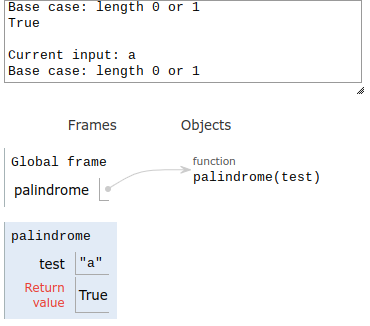



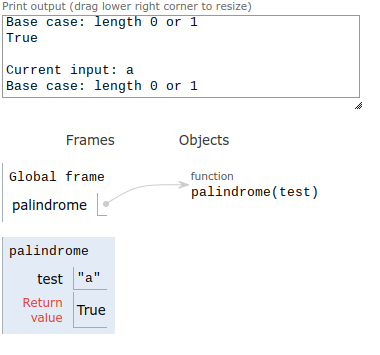

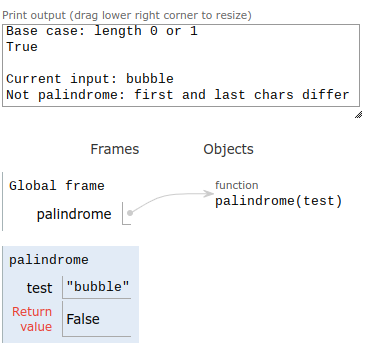

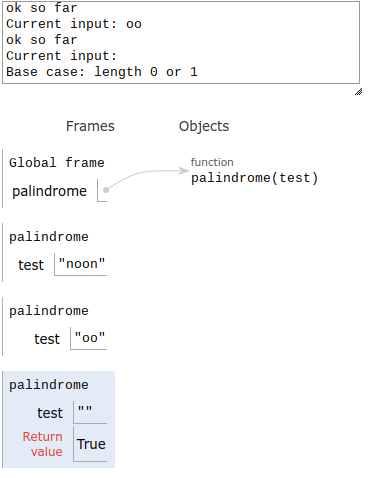

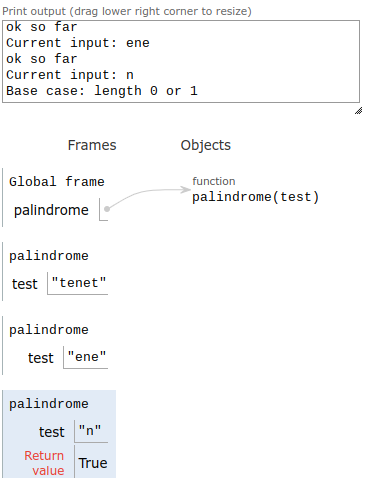

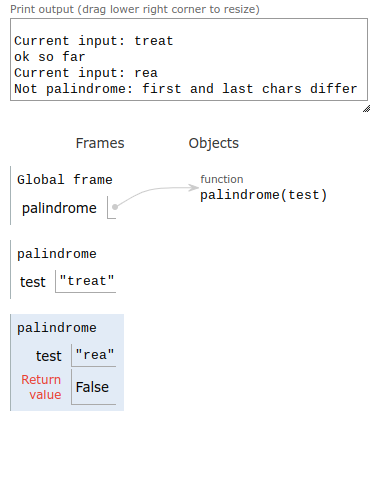

My explanation of my upload stack diagram above:

These codes are observing for the first and last characters(or letters) in a string to determine whether they are the equal or not. After seeing the codes work its magic, it has come to my attention that if this code turns out to be true then it will continually move on towards down the middle of the letters from both sides(if the word is even such as noon then it will still goes down the middle even if there is nothing there). Also, it will restart the process on the next word if it becomes true. However, if this code becomes false then it will stop where it is and not move onto the next letter. 

### Reflections
Add a text cell below to answer the following questions:
1. What do you feel more confident about after completing this lab?

  I feel more confident about the bacis of recursions such as the palindrome. 
2. What do you feel you can use more help with after completing this lab?

  I feel like I could use more help with knowing when to either strip or make a code for clear to make it understandable. 
3. Do you have any constructive suggestions on how we can help you or improve this lab?

  I could email, text, or go to office hours towards either a professor or a TA for clarification. 

### Save your work to GitHub
Please save this notebook to your lab repository.